In [3]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras import initializers
import numpy as np
from matplotlib import pyplot as plt

In [4]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargo Data

In [5]:
folder = 'DATA/'
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x_test = np.load(folder+'test_images.npy')

In [6]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

In [7]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

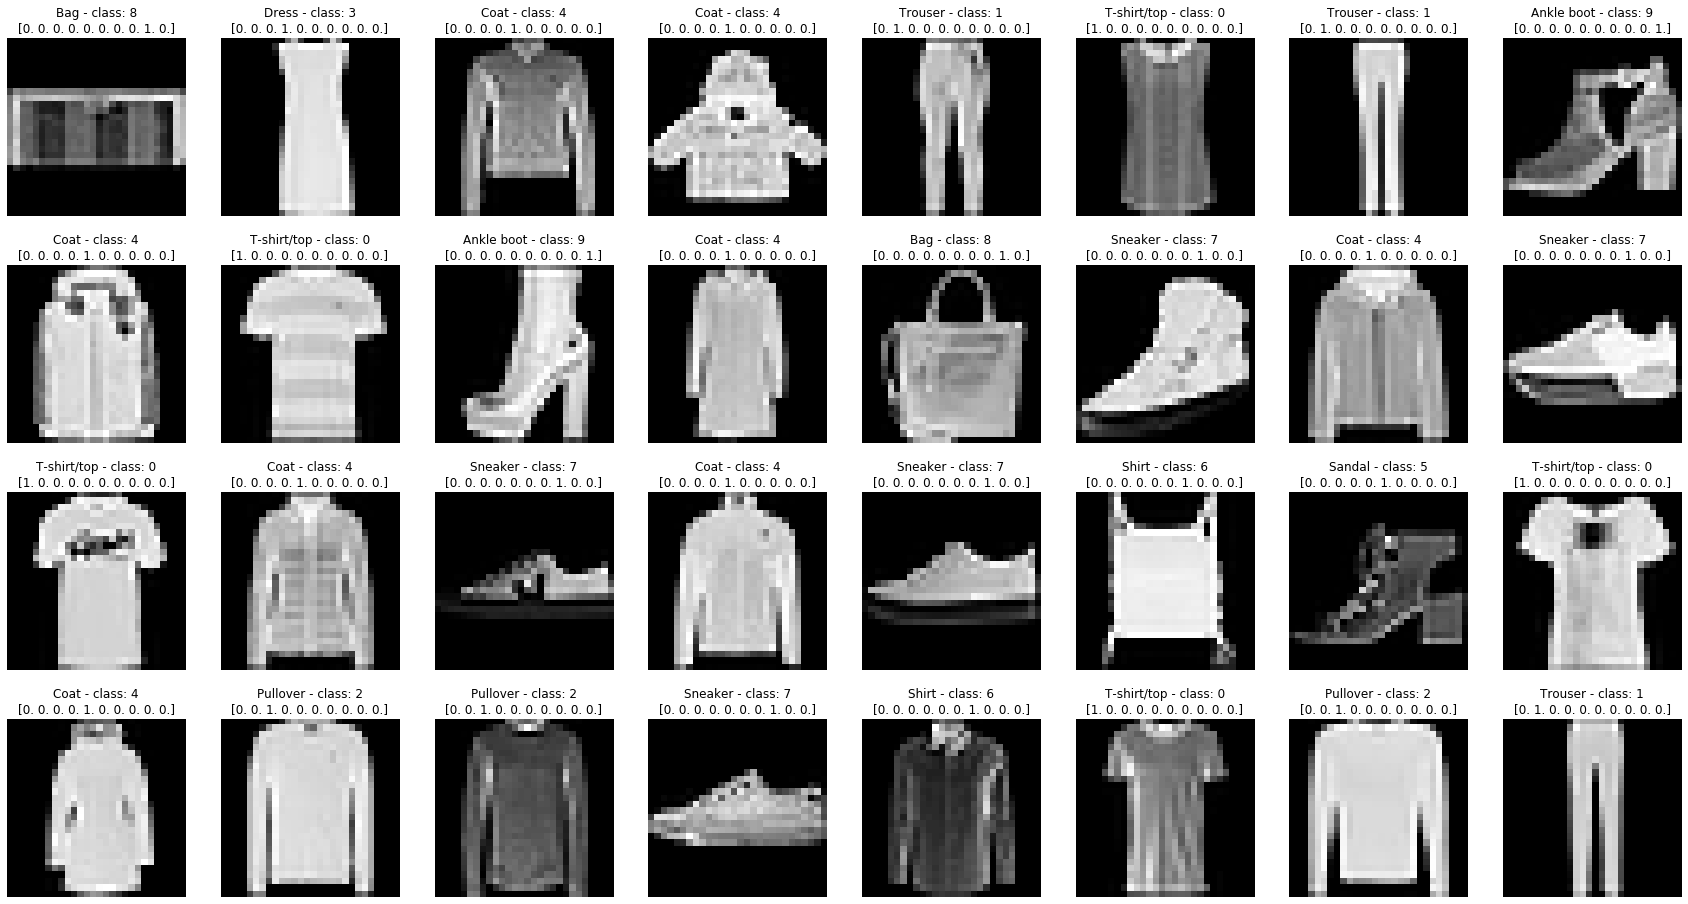

In [8]:
alto = 4
ancho = 8
f, axs = plt.subplots(alto, ancho, figsize=(30,4*alto))
axs = axs.reshape(-1)
for i in range(alto*ancho):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title(f'{classes[int(y_train[i])]} - class: {int(y_train[i])}\n{y_train_categorical[i]}')
    axs[i].axis('off')

In [9]:
x_train = x_train/255
x_valid = x_valid/255
y_train = y_train/255
y_valid = y_valid/255

#####################################3

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)
scaler.fit(y_train)
scaler.fit(y_valid)
scaler.fit(x_valid)


ValueError: Found array with dim 3. MinMaxScaler expected <= 2.

In [ ]:
output_size = 10

model_mlp = Sequential()
model_mlp.add(Flatten(input_shape=x_train.shape[1:]))
model_mlp.add(Dense(units=15,activation='relu'))
model_mlp.add(BatchNormalization())
model_mlp.add(Dense(units=15,activation='relu'))
model_mlp.add(BatchNormalization())
model_mlp.add(Dense(output_size, name='Salida'))
model_mlp.add(Activation('softmax'))
model_mlp.summary()

In [ ]:
lr = 0.001 

selectedOptimizer = optimizers.Adam(lr=lr)


model_mlp.compile(loss = 'binary_crossentropy', optimizer=selectedOptimizer, metrics=['accuracy'])



#model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
batch_size = 512
model_mlp.fit(x_train, 
                       y_train_categorical,
                       epochs=30, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_val_categorical)
                      )

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_mlp.history.history['loss'], label='train')
ax1.plot(model_mlp.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_mlp.history.history['accuracy'], label='train')
ax2.plot(model_mlp.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
plt.show()

In [ ]:
loss, acc = model_mlp.evaluate(x_valid, y_val_categorical, verbose=0)
print(acc, loss)

In [ ]:
# Calculo probabilidades de cada clase para cada observación
test_prediction = model_mlp.predict(x_test)
print(test_prediction.shape)

In [ ]:
# Calculo clase
test_labels = np.argmax(test_prediction, axis = 1)
print(test_labels)

# Armo CSV para submitear

In [ ]:
import pandas
df = pandas.DataFrame(data={"Category": test_labels}).astype(int)
df.to_csv("./submission.csv", sep=',',index=True,  index_label='Id')